In [1]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import os
import requests
from MCForecastTools import MCSimulation
from datetime import date
from datetime import timedelta

%matplotlib inline

In [2]:
# import data from CSV file

data_df = pd.read_csv(Path("Index Data - CIQ - 05.04.22.csv"))
data_df.head()

,Date,SPY,CPI Index,10-Year Rate,30-Year Rate
0,5/5/1980,106.38,80.9,10.18%,10.35%
1,5/6/1980,106.25,80.9,9.80%,10.23%
2,5/7/1980,107.18,80.9,9.96%,10.19%
3,5/8/1980,106.13,80.9,10.18%,10.34%
4,5/9/1980,104.72,80.9,10.30%,10.41%


In [3]:
# set Date as index for the dataframe

data_df = data_df.set_index('Date')

# Display first and last 5 rows of dataframe
data_df.head()

,SPY,CPI Index,10-Year Rate,30-Year Rate
Date,,,,
5/5/1980,106.38,80.9,10.18%,10.35%
5/6/1980,106.25,80.9,9.80%,10.23%
5/7/1980,107.18,80.9,9.96%,10.19%
5/8/1980,106.13,80.9,10.18%,10.34%
5/9/1980,104.72,80.9,10.30%,10.41%


In [4]:
data_df.tail()

,SPY,CPI Index,10-Year Rate,30-Year Rate
Date,,,,
4/28/2022,"4,287.50",287.71,2.85%,2.92%
4/29/2022,"4,131.93",287.71,2.89%,2.96%
5/2/2022,"4,155.38",287.71,2.99%,3.07%
5/3/2022,"4,175.48",287.71,2.97%,3.03%
5/4/2022,"4,300.17",287.71,2.93%,3.01%


In [5]:
# Display data types

data_df.dtypes

SPY              object
CPI Index       float64
10-Year Rate     object
30-Year Rate     object
dtype: object

In [6]:
# cleanup data replace % sign in ["10-Year Rate"] and ["10-Year Rate"] columns, change data types to float 
# clean up thousandth commas of ['SPY'] columns

data_df['10-Year Rate'] = data_df['10-Year Rate'].str.replace("%","",regex = True).astype(float)
data_df['30-Year Rate'] = data_df['30-Year Rate'].str.replace("%","",regex = True).astype(float)
data_df['SPY'] = data_df['SPY'].str.replace(",","",regex = True).astype(float)

In [7]:
# Display data types

data_df.dtypes

SPY             float64
CPI Index       float64
10-Year Rate    float64
30-Year Rate    float64
dtype: object

In [8]:
# Display dataframe
display (data_df.head())
display (data_df.tail())

,SPY,CPI Index,10-Year Rate,30-Year Rate
Date,,,,
5/5/1980,106.38,80.9,10.18,10.35
5/6/1980,106.25,80.9,9.80,10.23
5/7/1980,107.18,80.9,9.96,10.19
5/8/1980,106.13,80.9,10.18,10.34
5/9/1980,104.72,80.9,10.30,10.41


,SPY,CPI Index,10-Year Rate,30-Year Rate
Date,,,,
4/28/2022,4287.50,287.71,2.85,2.92
4/29/2022,4131.93,287.71,2.89,2.96
5/2/2022,4155.38,287.71,2.99,3.07
5/3/2022,4175.48,287.71,2.97,3.03
5/4/2022,4300.17,287.71,2.93,3.01


In [9]:
# Rename ['SPY'] column to ['close']

SPY = pd.DataFrame(data_df['SPY'])
SPY.columns = ['close']

In [10]:
final = pd.concat([SPY],axis=1,keys = ['SPY'])
final.head()

,SPY
,close
Date,
5/5/1980,106.38
5/6/1980,106.25
5/7/1980,107.18
5/8/1980,106.13
5/9/1980,104.72


In [11]:
SPY = final['SPY']
SPY.head()

,close
Date,
5/5/1980,106.38
5/6/1980,106.25
5/7/1980,107.18
5/8/1980,106.13
5/9/1980,104.72


In [12]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns
# The weights being at 100% SPY.
# Run 500 samples.

MC_fiveyear = MCSimulation(portfolio_data = final,
                           num_simulation = 500,
                           num_trading_days = 252*5
                          )

In [16]:
'''
# Review the Monte Carlo simulation input data
MC_fiveyear.portfolio_data.head().dropna()
'''

SPY             
           close daily_return
Date                         
5/6/1980  106.25    -0.001222
5/7/1980  107.18     0.008753
5/8/1980  106.13    -0.009797
5/9/1980  104.72    -0.013286

In [17]:
# Run the Monte Carlo simulation, forecast 5 years cumulative returns

data = MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/genesis/Desktop/Fintech-Workspace/Mod8_Challenge/Project_1/FinTechP01/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

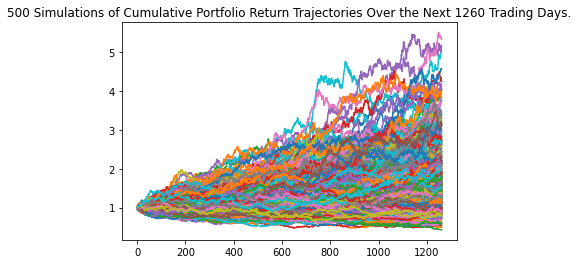

In [18]:
# visualize the Five years Monte Carlo simulation by using an overlay line plot simulation

MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

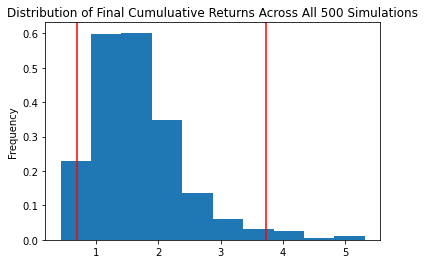

In [19]:
# Visualize the probability distribution of the Five years Monte Carlo simulation 
# by plotting a histogram
MC_fiveyear.plot_distribution()

In [90]:
# Generate summary statistics from the Five years Monte Carlo simulation results

MC_fiveyear.summarize_cumulative_return()

count           500.000000
mean              1.712029
std               0.715347
min               0.463366
25%               1.204720
50%               1.587723
75%               2.067910
max               4.997473
95% CI Lower      0.752406
95% CI Upper      3.604140
Name: 1260, dtype: float64

In [20]:
''' PLEASE REVIEW NUMBER / WITH .dropna()
# Generate summary statistics from the Five years Monte Carlo simulation results

MC_fiveyear.summarize_cumulative_return()
'''

count           500.000000
mean              1.678275
std               0.745713
min               0.429157
25%               1.149305
50%               1.594769
75%               1.978835
max               5.314578
95% CI Lower      0.698274
95% CI Upper      3.726662
Name: 1260, dtype: float64

In [95]:
'''
WE can put this at the top with all libraries and dependancies
'''

import scipy.stats as st
import numpy as np

data2 = data.mean()
    
interval = st.t.interval(alpha=0.95, df=len(data2)-1, loc=np.mean(data2), scale=st.sem(data2))

(1.291876929683312, 1.3530439418834765)

In [91]:
MC_fiveyear

In [96]:
final.iloc[-1]

SPY  close    4300.17
Name: 5/4/2022, dtype: float64

In [98]:
print(f"{interval[0] * final.iloc[-1]}")
print(f"{interval[1] * final.iloc[-1]}")

SPY  close    5555.290417
Name: 5/4/2022, dtype: float64
SPY  close    5818.318968
Name: 5/4/2022, dtype: float64
